In [1]:
import mne
import pandas as pd
import matplotlib as plt
import EntropyHub as EH
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

# Baseline EEG before arithmetic operation

In [8]:
file = "Subject03_1.edf"

raw = mne.io.read_raw_edf(file, preload=True)
raw_data_basal = raw.get_data()
print(raw_data_basal)
# metadata included in the file and a list of all channels:
info = raw.info
channels = raw.ch_names
fs = raw.info['sfreq']
print(fs)
print(len(raw.times))
print(channels)

Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\Subject03_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
[[ 5.88730490e-06  4.21140718e-06  2.13205259e-06 ...  9.72769970e-10
   9.72769970e-10  9.72769970e-10]
 [ 4.62250562e-06  3.45063266e-06  1.88863172e-06 ...  5.31450217e-10
   5.31450217e-10  5.31450217e-10]
 [ 3.46950516e-06  1.68732456e-06 -5.75345921e-07 ... -2.14107881e-10
  -2.14107881e-10 -2.14107881e-10]
 ...
 [ 3.88531648e-06  3.20679261e-06  2.92713075e-06 ... -1.49593042e-10
  -1.49593042e-10 -1.49593042e-10]
 [ 2.92565616e-07 -4.50582624e-07 -1.15796904e-06 ... -5.06929274e-10
  -5.06929274e-10 -5.06929274e-10]
 [ 4.96839355e-06  4.22398485e-06  3.28501479e-06 ...  2.84916457e-09
   2.84916457e-09  2.84916457e-09]]
500.0
91000
['EEG Fp1', 'EEG Fp2', 'EEG F3', 'EEG F4

Using matplotlib as 2D backend.


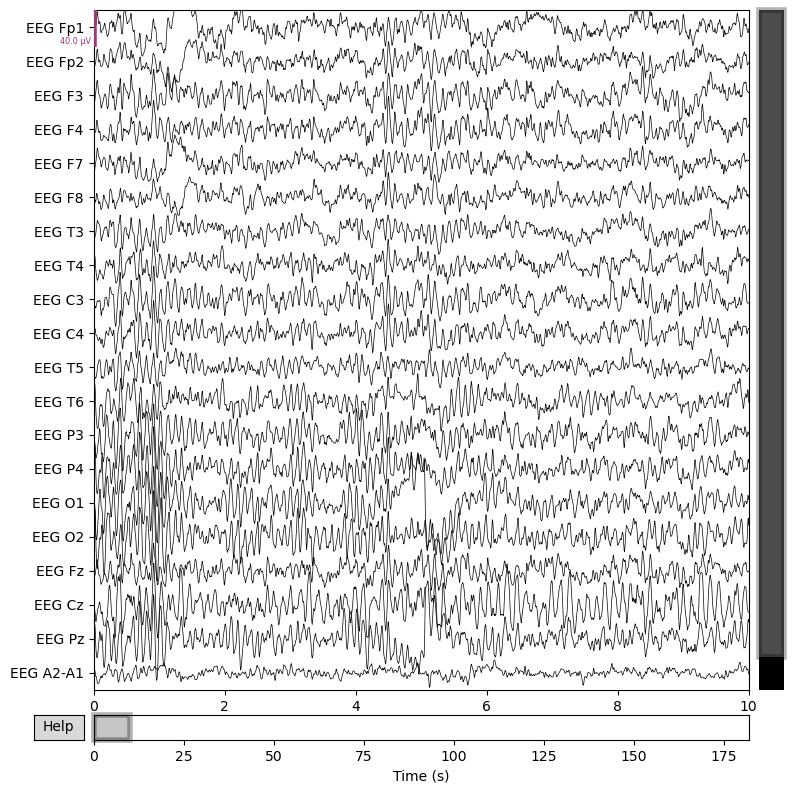

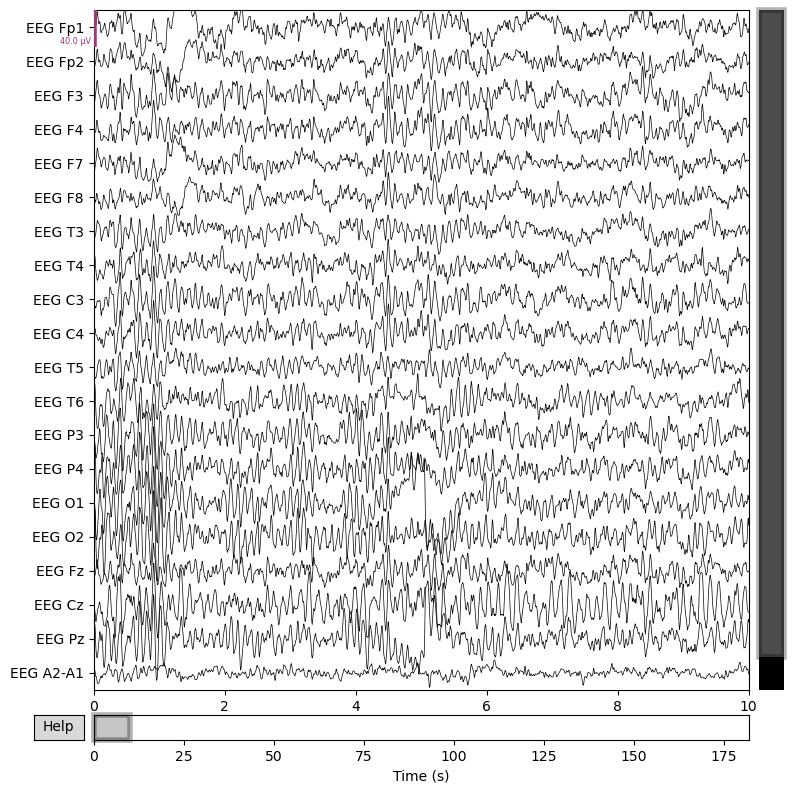

In [10]:
raw.plot()

In [16]:
print(info)

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2010-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
 subject_info: 4 items (dict)
>


# Baseline EEG during arithmetic operation

In [12]:
file = "Subject03_2.edf"

raw = mne.io.read_raw_edf(file, preload=True)
raw_data_basal = raw.get_data()
print(raw_data_basal)
# metadata included in the file and a list of all channels:
info = raw.info
channels = raw.ch_names
fs = raw.info['sfreq']
print(fs)
print(len(raw.times))
print(channels)

Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\Subject03_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
[[ 5.03567853e-06  3.35624181e-06  9.28292089e-07 ... -1.15627375e-10
  -1.15627375e-10 -1.15627375e-10]
 [ 8.70609396e-07 -8.66255552e-07 -3.21896181e-06 ... -2.28708171e-10
  -2.28708171e-10 -2.28708171e-10]
 [ 2.30078720e-06  1.97819668e-06  1.20950956e-06 ...  2.55970092e-10
   2.55970092e-10  2.55970092e-10]
 ...
 [ 8.76881017e-07  2.58991288e-06  4.71945498e-06 ... -9.94412451e-10
  -9.94412451e-10 -9.94412451e-10]
 [ 8.74496959e-06  7.46533384e-06  5.60197800e-06 ... -2.18792401e-10
  -2.18792401e-10 -2.18792401e-10]
 [-4.71603992e-06 -5.97894163e-06 -8.27435084e-06 ...  2.77528038e-09
   2.77528038e-09  2.77528038e-09]]
500.0
31000
['EEG Fp1', 'EEG Fp2', 'EEG F3', 'EEG F4

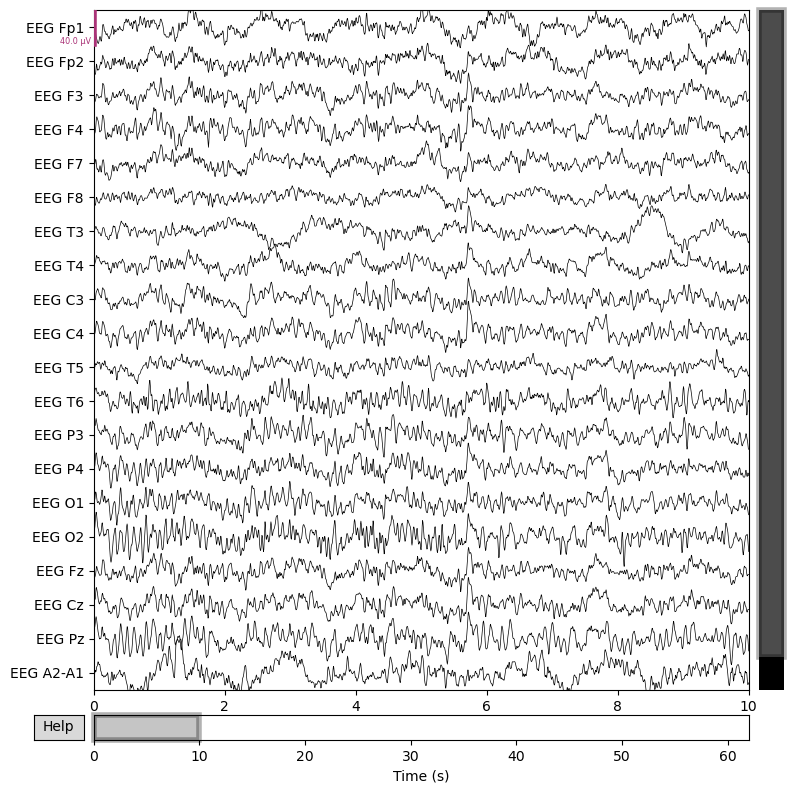

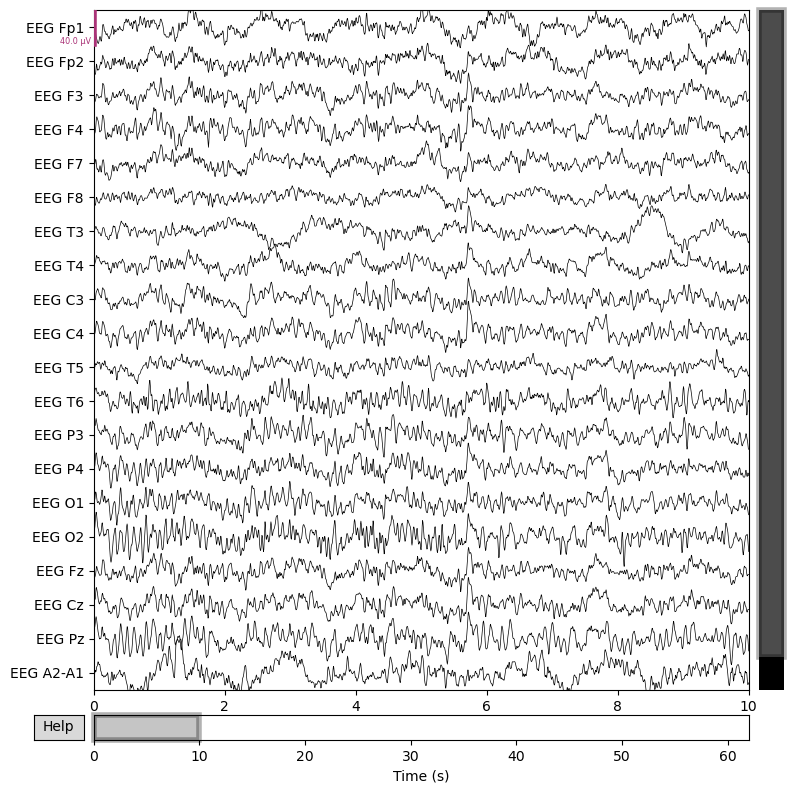

In [14]:
raw.plot()

## Preprocessing of signals before arithmetic operations

In [1]:
import mne
import glob

# Original files path
path_original = "subjects_before"

# Path to cropped files
path_before = "subjects_before/cropped"


clipping_duration = 61.998

# Process all .edf files in the folder
for file in glob.glob(path_original + r"\*.edf"):
    # Load data
    data = mne.io.read_raw_edf(file, preload=True)

    # Crop
    data.crop(tmin=0, tmax=clipping_duration)

    # Save clipped file in .fif format
    file_name = file.split("\\")[-1].replace(".edf", "_cropped.fif")
    full_path = f"{path_before}\\{file_name}"

    data.save(full_path, overwrite=True)

# Load data from the .fif file
for clipped_file in glob.glob(path_before + r"\*.fif"):
    clipped_data = mne.io.read_raw_fif(clipped_file, preload=True)
    print(f"File data: {clipped_file}")
    print(clipped_data)


Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Overwriting existing file.
Writing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject00_1_recortado.fif
Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject00_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\Subject01_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure..

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject00_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data.save(full_path, overwrite=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject01_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.

Writing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject01_1_recortado.fif
Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject01_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\Subject02_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Overwriting existing file.
Writing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject02_1_recortado.fif
Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject02_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data.save(full_path, overwrite=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject03_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.

Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject03_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\Subject04_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 84999  =      0.000 ...   169.998 secs...
Overwriting existing file.
Writing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject04_1_recortado.fif
Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject04_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-dur

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject04_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data.save(full_path, overwrite=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject05_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.

Writing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject05_1_recortado.fif
Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject05_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\Subject06_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Overwriting existing file.
Writing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject06_1_recortado.fif
Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject06_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data.save(full_path, overwrite=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject07_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.

Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject07_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\Subject08_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Overwriting existing file.
Writing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject08_1_recortado.fif
Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject08_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-dur

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject08_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data.save(full_path, overwrite=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject09_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.

Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject09_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\Subject10_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 93999  =      0.000 ...   187.998 secs...
Overwriting existing file.
Writing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject10_1_recortado.fif
Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject10_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-dur

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject10_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data.save(full_path, overwrite=True)


Overwriting existing file.
Writing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject11_1_recortado.fif
Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject11_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\Subject12_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Overwriting existing file.
Writing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject12_1_recortado.fif


C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject11_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data.save(full_path, overwrite=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject12_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.

Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject12_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\Subject13_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Overwriting existing file.
Writing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject13_1_recortado.fif
Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject13_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-dur

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject13_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data.save(full_path, overwrite=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject14_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.

[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\Subject15_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Overwriting existing file.
Writing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject15_1_recortado.fif
Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject15_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\Subject16_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info stru

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject15_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data.save(full_path, overwrite=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject16_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.

Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject16_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\Subject17_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Overwriting existing file.
Writing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject17_1_recortado.fif
Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject17_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-dur

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject17_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data.save(full_path, overwrite=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject18_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.

[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\Subject19_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Overwriting existing file.
Writing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject19_1_recortado.fif
Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject19_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\Subject20_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info stru

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject19_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data.save(full_path, overwrite=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject20_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.

Writing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject20_1_recortado.fif
Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject20_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\Subject21_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Overwriting existing file.
Writing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject21_1_recortado.fif
Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject21_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data.save(full_path, overwrite=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject22_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.

Writing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject22_1_recortado.fif
Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject22_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\Subject23_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Overwriting existing file.
Writing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject23_1_recortado.fif
Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject23_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data.save(full_path, overwrite=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject24_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.

Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject24_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\Subject25_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Overwriting existing file.
Writing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject25_1_recortado.fif
Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject25_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-dur

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject25_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data.save(full_path, overwrite=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject26_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.

Writing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject26_1_recortado.fif
Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject26_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\Subject27_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Overwriting existing file.
Writing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject27_1_recortado.fif
Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject27_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data.save(full_path, overwrite=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject28_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.

Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject28_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\Subject29_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Overwriting existing file.
Writing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject29_1_recortado.fif
Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject29_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-dur

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject29_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data.save(full_path, overwrite=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject30_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.

[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\Subject31_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 39999  =      0.000 ...    79.998 secs...
Overwriting existing file.
Writing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject31_1_recortado.fif
Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject31_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\Subject32_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info stru

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject31_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data.save(full_path, overwrite=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject32_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.

Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject32_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\Subject33_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Overwriting existing file.
Writing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject33_1_recortado.fif
Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject33_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-dur

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject33_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data.save(full_path, overwrite=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject34_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.

Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject34_1_recortado.fif
[done]
Extracting EDF parameters from C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\Subject35_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Overwriting existing file.
Writing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject35_1_recortado.fif
Closing C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject35_1_recortado.fif
[done]
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-menta

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:25: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject35_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data.save(full_path, overwrite=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:29: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject00_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.

File data: C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject01_1_recortado.fif
<Raw | Subject01_1_recortado.fif, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject02_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
File data: C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject02_1_recortado.fif
<Raw | Subject02_1_recortado.fif, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-t

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:29: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject02_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clipped_data = mne.io.read_raw_fif(clipped_file, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:29: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject03_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw

File data: C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject04_1_recortado.fif
<Raw | Subject04_1_recortado.fif, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject05_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
File data: C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject05_1_recortado.fif
<Raw | Subject05_1_recortado.fif, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-t

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:29: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject05_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clipped_data = mne.io.read_raw_fif(clipped_file, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:29: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject06_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw

Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
File data: C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject08_1_recortado.fif
<Raw | Subject08_1_recortado.fif, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject09_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
File data: C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject09_1_recortado.fif
<Raw | Subject09_1_recortado.fif, 21 x 31000 (62.0 s), ~5.0 MB, data loade

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:29: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject09_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clipped_data = mne.io.read_raw_fif(clipped_file, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:29: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject10_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw

Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
File data: C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject12_1_recortado.fif
<Raw | Subject12_1_recortado.fif, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject13_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
File data: C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject13_1_recortado.fif
<Raw | Subject13_1_recortado.fif, 21 x 31000 (62.0 s), ~5.0 MB, data loade

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:29: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject13_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clipped_data = mne.io.read_raw_fif(clipped_file, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:29: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject14_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw

Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
File data: C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject16_1_recortado.fif
<Raw | Subject16_1_recortado.fif, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject17_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
File data: C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject17_1_recortado.fif
<Raw | Subject17_1_recortado.fif, 21 x 31000 (62.0 s), ~5.0 MB, data loade

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:29: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject16_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clipped_data = mne.io.read_raw_fif(clipped_file, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:29: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject17_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw

Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
File data: C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject19_1_recortado.fif
<Raw | Subject19_1_recortado.fif, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject20_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
File data: C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject20_1_recortado.fif
<Raw | Subject20_1_recortado.fif, 21 x 31000 (62.0 s), ~5.0 MB, data loade

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:29: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject19_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clipped_data = mne.io.read_raw_fif(clipped_file, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:29: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject20_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw

File data: C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject21_1_recortado.fif
<Raw | Subject21_1_recortado.fif, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject22_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
File data: C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject22_1_recortado.fif
<Raw | Subject22_1_recortado.fif, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-t

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:29: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject22_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clipped_data = mne.io.read_raw_fif(clipped_file, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:29: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject23_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw

File data: C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject24_1_recortado.fif
<Raw | Subject24_1_recortado.fif, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject25_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
File data: C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject25_1_recortado.fif
<Raw | Subject25_1_recortado.fif, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-t

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:29: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject25_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clipped_data = mne.io.read_raw_fif(clipped_file, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:29: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject26_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw

    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
File data: C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject27_1_recortado.fif
<Raw | Subject27_1_recortado.fif, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject28_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
File data: C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject28_1_recortado.fif
<Raw | Subject28_1_recortado.fif, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>
Opening raw dat

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:29: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject28_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clipped_data = mne.io.read_raw_fif(clipped_file, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:29: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject29_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw

Reading 0 ... 30999  =      0.000 ...    61.998 secs...
File data: C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject30_1_recortado.fif
<Raw | Subject30_1_recortado.fif, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject31_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
File data: C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject31_1_recortado.fif
<Raw | Subject31_1_recortado.fif, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-ment

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:29: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject31_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clipped_data = mne.io.read_raw_fif(clipped_file, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:29: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject32_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw

    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
File data: C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject33_1_recortado.fif
<Raw | Subject33_1_recortado.fif, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>
Opening raw data file C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject34_1_recortado.fif...
Isotrak not found
    Range : 0 ... 30999 =      0.000 ...    61.998 secs
Ready.
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
File data: C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject34_1_recortado.fif
<Raw | Subject34_1_recortado.fif, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>
Opening raw dat

C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:29: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject34_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clipped_data = mne.io.read_raw_fif(clipped_file, preload=True)
C:\Users\pablo\AppData\Local\Temp\ipykernel_29016\3752366978.py:29: RuntimeWarning: This filename (C:\Users\pablo\Documents\UNIVERSIDAD\TFG\eeg-during-mental-arithmetic-tasks-1.0.0\eeg-during-mental-arithmetic-tasks-1.0.0\pacientes_antes\recortados\Subject35_1_recortado.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw